<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a01794067-janmenc/blob/main/Actividad_Semanal_6_A01794067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Maestría en Inteligencia Artificial Aplicada**

## **A01794067**
## **Jose Antonio Mendoza Castro**
## *Actividad semana 6*

## **Ciencia y analitica de datos**

## **Dra. Maria de la Paz Rico**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
from sklearn.preprocessing import scale

from sklearn.decomposition import PCA

In [4]:
pd.set_option('display.max_columns', None)

### **1. Carga de los datos**

In [2]:
#carga de datos
df = pd.read_csv('default of credit card clients.csv')

### **2. Exploración de los datos** 

In [5]:
#realicemos un vistazo general de los datos
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [6]:
#nuetros datos tienen 30,000 filas y 25 columnas
df.shape

(30000, 25)

In [7]:
#tenemos dos variables de tipo entero y 23 de tipo flotante
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [8]:
#tenemos algunos nulos en nuesro datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [11]:
#podemos explorar un poco más nuestros datos nulos
df.isnull().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

### **3. Limpieza de los datos**

In [13]:
#Para el caso de la variable X5 (edad) se le imputará la media.
mean_age = df['X5'].mean()
df['X5'] = df['X5'].fillna(mean_age) 

In [19]:
#Dado que de la variable X12 en adelante son valores que están relacionados al ser parte del historial de pago de cada usuario no sería correcto imputar algún valor, por lo que se eliminarán.
cols = df.columns[2:]

df.dropna(subset = cols, inplace = True)

In [20]:
#Volvemos a revisar los datos.
df.isnull().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

### **4. Estadística descriptiva** 

In [21]:
df.describe().round(1)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0
mean,15005.6,167555.9,1.6,1.9,1.6,35.5,-0.0,-0.1,-0.2,-0.2,-0.3,-0.3,51248.1,49200.5,47032.4,43279.3,40329.0,38889.9,5664.6,5925.7,5228.4,4829.9,4801.5,5220.7,0.2
std,8654.5,129737.3,0.5,0.8,0.5,9.2,1.1,1.2,1.2,1.2,1.1,1.1,73674.9,71211.2,69385.2,64364.7,60826.2,59582.9,16568.8,23056.0,17617.3,15676.2,15285.6,17789.0,0.4
min,1.0,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7516.2,50000.0,1.0,1.0,1.0,28.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3559.2,2984.0,2664.8,2327.5,1762.2,1256.0,1000.0,835.2,390.0,296.2,253.2,118.0,0.0
50%,15005.5,140000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,22379.0,21194.5,20085.5,19037.5,18104.5,17067.5,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0,0.0
75%,22497.8,240000.0,2.0,2.0,2.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,67190.0,64027.8,60183.0,54551.2,50220.8,49234.8,5007.0,5000.0,4511.5,4014.8,4040.0,4000.0,0.0
max,30000.0,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,8.0,8.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0


Para la descripción consideraremos sólo las variables numéricas:

X1 (cantidad de crédito otorgado). La media de los créditos otorgados es de casi 170 mil. Con respecto a las medidas de distribución podríamos decir que el 10% de los créditos fueron de 50 mil, el 50% de 140 mil y el crédito más alto fue de 1 millón.


X5 (edad). En cuestión de la edad podemos decir que la edad promedio fue de casi 36 años y que la edad máxima de solicitud fue de 79 años.


X12-X17 (montos en el estado de cuenta). Para los montos en los estados de cuenta la media estuvo entre 40 y 50 mil.


X18-X23 (montos pagados). La media de los montos pagados estuvo cerca de 6 mil.


### **5. Variables categóricas**

Variables categóricas: X2 (género), X3 (educación), X4 (estatus marital), X6-X11 (historial de pago).

Variables numéricas: X1 (cantidad de crédito otorgado), X5 (edad), X12-X17 (montos en el estado de cuenta), X18-X23 (montos pagados).

En total tenemos 9 variables categóricas.

### **6. Escalamiento de los datos**

In [22]:
#Para el número mínimo de componentes sólo consideraremos las variables númericas.
cols = ['X1', 'X5'] + list(df.columns[12:-1])

In [23]:
df_pca = df[cols].copy()

In [29]:
df_pca_scale = scale(df_pca)

### **7. Reducción de dimensiones**

#### a. Varianza

In [30]:
pca = PCA()

In [31]:
pca.fit(df_pca_scale)

PCA()

In [32]:
df_pca_summary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                               'Proportion of variance': pca.explained_variance_ratio_,
                               'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})

In [33]:
df_pca_summary = df_pca_summary.transpose()
df_pca_summary

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,2.432921,1.309882,1.022269,0.961876,0.940087,0.934241,0.882984,0.852438,0.841041,0.514249,0.266470,0.202644,0.15918,0.152463
Proportion of variance,0.422779,0.122552,0.074643,0.066084,0.063124,0.062341,0.055688,0.051902,0.050523,0.018889,0.005072,0.002933,0.00181,0.001660
Cumulative proportion,0.422779,0.545331,0.619974,0.686058,0.749182,0.811523,0.867211,0.919113,0.969636,0.988525,0.993597,0.996530,0.99834,1.000000


Con los resultados obtenidos tendríamos que cinco componentes acumulan cerca del 75% de la varianza. Por lo que podríamos considerar que son los que contienen la mayor parte de la información.

In [34]:
df_pca_components = pd.DataFrame(pca.components_.transpose(),
                                 columns = df_pca_summary.columns,
                                 index = df_pca.iloc[:, :].columns)

df_pca_components.iloc[:, :4].round(4)

,0,1,2,3
X1,0.1655,0.3007,-0.3786,-0.2001
X5,0.0328,0.0719,-0.8695,0.3390
X12,0.3724,-0.1908,-0.0342,-0.0639
X13,0.3833,-0.1746,-0.0018,0.0076
X14,0.3883,-0.1269,0.0347,0.0605
X15,0.3916,-0.1204,0.0341,0.0748
X16,0.3885,-0.1059,0.0339,0.0396
X17,0.3807,-0.0942,0.0185,-0.0706
X18,0.1351,0.3832,0.1738,0.3621
X19,0.1168,0.4084,0.2009,0.3457


En cuestión a la participación de la variables en los componentes, de X12 a X23 que corresponden a los montos en los estados de cuenta y los montos pagados son las variables que tienen una mayor participación en los componentes.

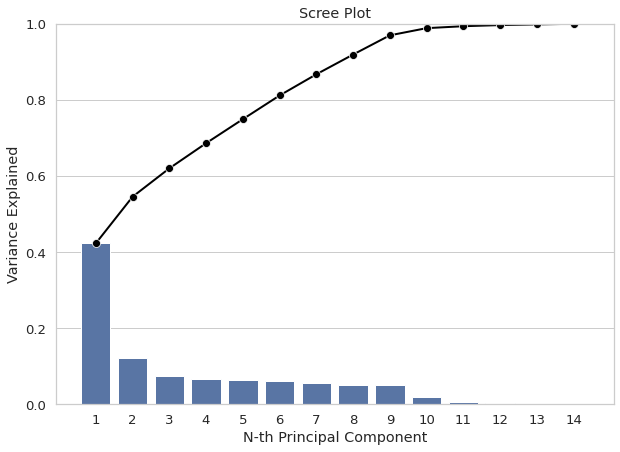

In [35]:
PC_components = np.arange(pca.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

### **8. Histograma de los atributos**

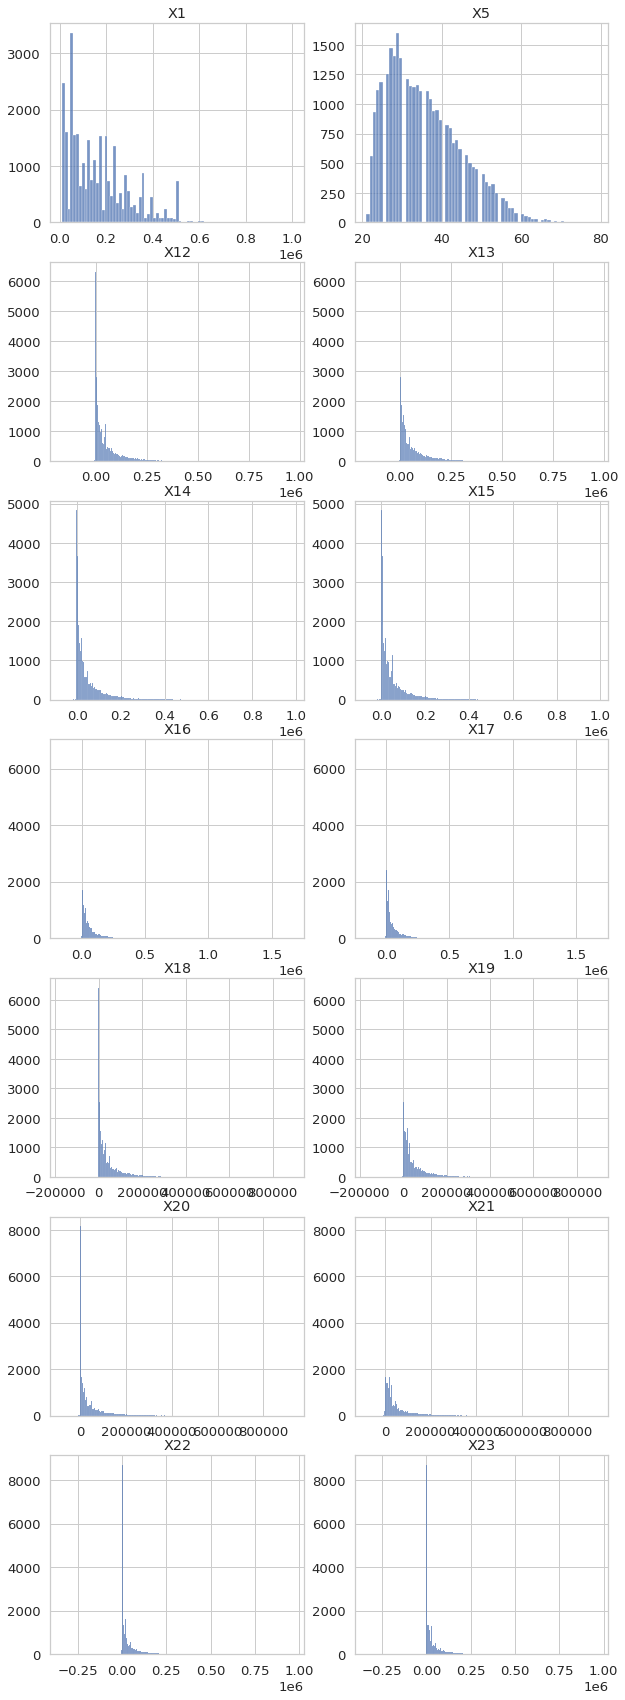

In [46]:
fig, ax = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 30))

cols = df_pca.columns

for i in range(7):

  if i == 0:
    sns.histplot(df_pca[cols[i]], ax = ax[i, 0], legend = False).set(xlabel=None, ylabel=None, title = 'X1')
    sns.histplot(df_pca[cols[i + 1]], ax = ax[i, 1], legend = False).set(xlabel=None, ylabel=None, title = 'X5')
  
  elif i == 1:
    sns.histplot(df_pca[cols[i + 1]], ax = ax[i, 0], legend = False).set(xlabel=None, ylabel=None, title = 'X12')
    sns.histplot(df_pca[cols[i + 1]], ax = ax[i, 1], legend = False).set(xlabel=None, ylabel=None, title = 'X13')

  elif i == 2:
    sns.histplot(df_pca[cols[i + 1]], ax = ax[i, 0], legend = False).set(xlabel=None, ylabel=None, title = 'X14')
    sns.histplot(df_pca[cols[i + 1]], ax = ax[i, 1], legend = False).set(xlabel=None, ylabel=None, title = 'X15')

  elif i == 3:
    sns.histplot(df_pca[cols[i + 1]], ax = ax[i, 0], legend = False).set(xlabel=None, ylabel=None, title = 'X16')
    sns.histplot(df_pca[cols[i + 1]], ax = ax[i, 1], legend = False).set(xlabel=None, ylabel=None, title = 'X17')

  elif i == 4:
    sns.histplot(df_pca[cols[i + 1]], ax = ax[i, 0], legend = False).set(xlabel=None, ylabel=None, title = 'X18')
    sns.histplot(df_pca[cols[i + 1]], ax = ax[i, 1], legend = False).set(xlabel=None, ylabel=None, title = 'X19')

  elif i == 5:
    sns.histplot(df_pca[cols[i + 1]], ax = ax[i, 0], legend = False).set(xlabel=None, ylabel=None, title = 'X20')
    sns.histplot(df_pca[cols[i + 1]], ax = ax[i, 1], legend = False).set(xlabel=None, ylabel=None, title = 'X21')

  elif i == 6:
    sns.histplot(df_pca[cols[i + 1]], ax = ax[i, 0], legend = False).set(xlabel=None, ylabel=None, title = 'X22')
    sns.histplot(df_pca[cols[i + 1]], ax = ax[i, 1], legend = False).set(xlabel=None, ylabel=None, title = 'X23')